<a href="https://colab.research.google.com/github/ajebril1/Data-Science-project/blob/main/tech_salaries_model_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.tree import DecisionTreeRegressor
# creating the dataframe and displaying it
url = "https://raw.githubusercontent.com/ajebril1/Data-Science-project/refs/heads/main/tech_companies_salary.csv"
df = pd.read_csv(url)
df.head(5)

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [2]:
!git clone https://github.com/ajebril1/Data-Science-project
%cd Data-Science-project
df = pd.read_csv("tech_companies_salary.csv")
df.head(5)

Cloning into 'Data-Science-project'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 49 (delta 16), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (49/49), 2.75 MiB | 3.37 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/Data-Science-project


,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [3]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,cityid,dmaid,rowNumber,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic
count,6.264200e+04,62642.000000,62642.000000,6.264200e+04,6.264200e+04,62642.000000,62642.000000,62640.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000,62642.000000
mean,2.163004e+05,7.204135,2.702093,1.366873e+05,5.148608e+04,19334.746588,9856.201989,616.097222,41694.723732,0.245698,0.201223,0.028783,0.005108,0.005667,0.187925,0.128221,0.012835,0.011015,0.018039
std,1.380337e+05,5.840375,3.263656,6.136928e+04,8.187457e+04,26781.292040,6679.104563,289.843390,24488.865879,0.430504,0.400917,0.167196,0.071291,0.075067,0.390655,0.334338,0.112562,0.104373,0.133094
min,1.000000e+04,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.350000e+05,3.000000,0.000000,1.080000e+05,0.000000e+00,1000.000000,7369.000000,506.000000,20069.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.880000e+05,6.000000,2.000000,1.400000e+05,2.500000e+04,14000.000000,7839.000000,807.000000,42019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.640000e+05,10.000000,4.000000,1.700000e+05,6.500000e+04,26000.000000,11521.000000,807.000000,63021.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.980000e+06,69.000000,69.000000,1.659870e+06,2.800000e+06,1000000.000000,47926.000000,881.000000,83875.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Exploratory Data Analysis (EDA)
# How many rows and columns are there in the dataset?
num_rows, num_cols = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 62642
Number of columns: 29


In [5]:
# how many missing values are there in each column?
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
timestamp                      0
company                        5
level                        123
title                          0
totalyearlycompensation        0
location                       0
yearsofexperience              0
yearsatcompany                 0
tag                          870
basesalary                     0
stockgrantvalue                0
bonus                          0
gender                     19540
otherdetails               22508
cityid                         0
dmaid                          2
rowNumber                      0
Masters_Degree                 0
Bachelors_Degree               0
Doctorate_Degree               0
Highschool                     0
Some_College                   0
Race_Asian                     0
Race_White                     0
Race_Two_Or_More               0
Race_Black                     0
Race_Hispanic                  0
Race                       40215
Education                  32272
dtype: int64


In [6]:
# making a new data frame to store race data and salraies
race_cols =[col for col in df.columns if col.startswith('Race_')]
race_df = df[race_cols]
race_df=race_df.melt(var_name='Race',value_name='Count')
race_df

,Race,Count
0,Race_Asian,0
1,Race_Asian,0
2,Race_Asian,0
3,Race_Asian,0
4,Race_Asian,0
...,...,...
313205,Race_Hispanic,0
313206,Race_Hispanic,0
313207,Race_Hispanic,0
313208,Race_Hispanic,0


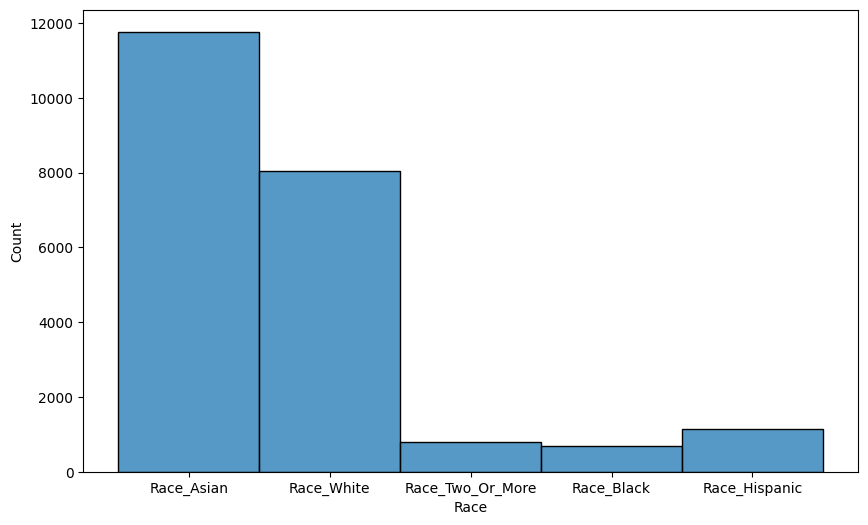

<Figure size 640x480 with 0 Axes>

In [7]:
# Visulization showing most common Races in the Tech Salaries Dataset. This along with the next visulization helps us interpret the income distribution among the races according to size.
plt.figure(figsize=(10,6))
sns.histplot(race_df,x='Race',weights='Count',discrete=True)
plt.show()
plt.savefig('races_count.png')

In [8]:
race_income = df.groupby('Race')['totalyearlycompensation'].sum()

dfrace_income = pd.DataFrame(race_income)

dfrace_income

rdata = dfrace_income['totalyearlycompensation']
rlabel = dfrace_income.index
totalincome = df['totalyearlycompensation'].sum()
totalformatted = "${:,.2f}".format(totalincome)




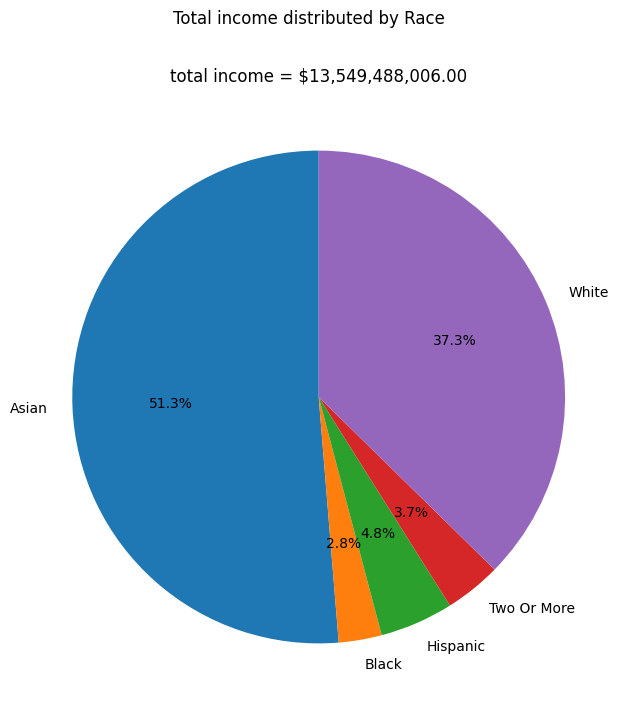

In [9]:
#This pie chart shows how the total income is distributed between the different races in our dataset
plt.figure(figsize=(8,8))
plt.pie(rdata,labels=rlabel,autopct='%1.1f%%',startangle=90)
plt.suptitle('Total income distributed by Race')
plt.title(f'total income = {totalformatted}')
plt.show()

In [10]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [11]:
edu_income = df.groupby('yearsofexperience')['basesalary'].sum()
edu_df = pd.DataFrame(edu_income)
edu_df

,basesalary
yearsofexperience,
0.00,476216500
0.25,233000
0.30,130000
0.50,315500
0.58,128000
...,...
40.00,2129000
41.00,292000
42.00,320000


In [12]:
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


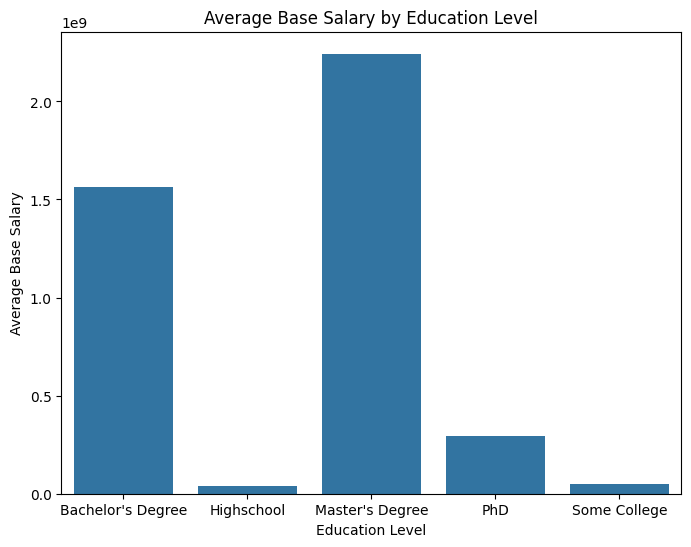

In [13]:
#This third plot shows base salries grouped by education level. This shows us the largest chunk of the total base salaries is held by people with masters degrees.
education_salary = df.groupby('Education')['basesalary'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=education_salary.index, y=education_salary.values)
plt.xlabel("Education Level")
plt.ylabel("Average Base Salary")
plt.title("Average Base Salary by Education Level")
plt.show()

In [14]:

print(df['Education'].notnull().sum())
#here we see that half of our dataset is missing values for education. this can show either self taught or missing

30370


In [15]:
dfcopy = df
dfcopy.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


In [16]:
#this dataset has al null values  in the education column dropped, alowing our model to be trained on only the educated subjects.
dfcopy = dfcopy.dropna(subset='Education')

In [17]:
#now we removed all rows with both the education and race columns being null in the dataset.
dfcopy = dfcopy.dropna(subset='Race')
dfcopy

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
15710,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000,...,1,0,0,1,0,0,0,0,Asian,PhD
23532,07-03-2020 19:56,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000,...,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
23533,07-03-2020 20:03,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
23534,07-03-2020 20:05,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
23535,07-03-2020 20:19,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,2/15/2021 19:50:36,Facebook,M2,Software Engineering Manager,1470000,"Menlo Park, CA",9.0,7.0,Full Stack,290000,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
61982,03-09-2021 17:03,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
61984,3/25/2021 10:45:03,Zapier,L8,Software Engineering Manager,1605000,"Denver, CO",16.0,2.0,Full Stack,250000,...,0,0,0,0,1,0,0,0,White,Master's Degree
61987,5/18/2021 15:34:21,Facebook,D1,Software Engineering Manager,2372000,"Menlo Park, CA",22.0,2.0,ML / AI,315000,...,0,0,0,0,0,0,1,0,Black,Master's Degree


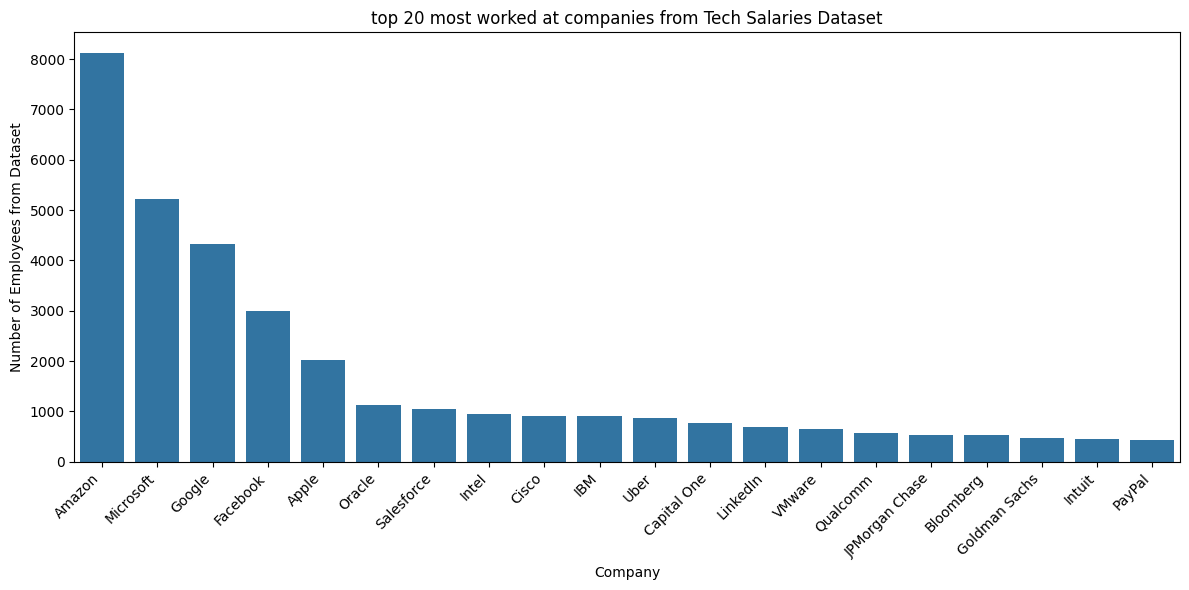

In [18]:
companies = df['company'].value_counts().nlargest(20)
plt.figure(figsize=(12,6))
sns.barplot(x=companies.index,y=companies.values)
plt.xlabel('Company')
plt.ylabel('Number of Employees from Dataset')
plt.title('top 20 most worked at companies from Tech Salaries Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

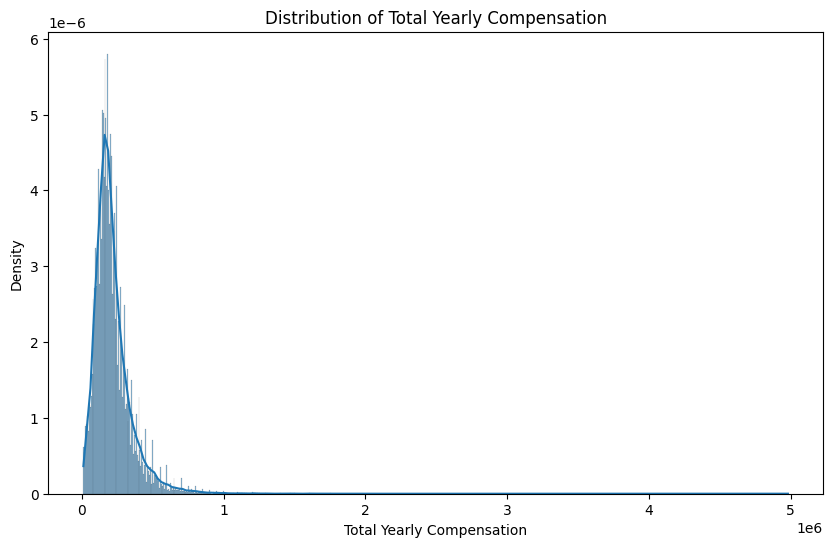

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['totalyearlycompensation'], kde=True, stat="density")
plt.xlabel("Total Yearly Compensation")
plt.ylabel("Density")
plt.title("Distribution of Total Yearly Compensation")
plt.show()

In [20]:
dfcopy

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
15710,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000,...,1,0,0,1,0,0,0,0,Asian,PhD
23532,07-03-2020 19:56,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000,...,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
23533,07-03-2020 20:03,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
23534,07-03-2020 20:05,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
23535,07-03-2020 20:19,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,2/15/2021 19:50:36,Facebook,M2,Software Engineering Manager,1470000,"Menlo Park, CA",9.0,7.0,Full Stack,290000,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
61982,03-09-2021 17:03,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
61984,3/25/2021 10:45:03,Zapier,L8,Software Engineering Manager,1605000,"Denver, CO",16.0,2.0,Full Stack,250000,...,0,0,0,0,1,0,0,0,White,Master's Degree
61987,5/18/2021 15:34:21,Facebook,D1,Software Engineering Manager,2372000,"Menlo Park, CA",22.0,2.0,ML / AI,315000,...,0,0,0,0,0,0,1,0,Black,Master's Degree


In [21]:
dfcopy

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
15710,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000,...,1,0,0,1,0,0,0,0,Asian,PhD
23532,07-03-2020 19:56,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000,...,0,0,0,0,0,1,0,0,Two Or More,Bachelor's Degree
23533,07-03-2020 20:03,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
23534,07-03-2020 20:05,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
23535,07-03-2020 20:19,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000,...,0,0,0,0,1,0,0,0,White,Bachelor's Degree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61981,2/15/2021 19:50:36,Facebook,M2,Software Engineering Manager,1470000,"Menlo Park, CA",9.0,7.0,Full Stack,290000,...,0,0,0,1,0,0,0,0,Asian,Bachelor's Degree
61982,03-09-2021 17:03,Google,L10,Product Manager,4500000,"San Francisco, CA",20.0,14.0,Consumer,450000,...,0,0,0,1,0,0,0,0,Asian,Master's Degree
61984,3/25/2021 10:45:03,Zapier,L8,Software Engineering Manager,1605000,"Denver, CO",16.0,2.0,Full Stack,250000,...,0,0,0,0,1,0,0,0,White,Master's Degree
61987,5/18/2021 15:34:21,Facebook,D1,Software Engineering Manager,2372000,"Menlo Park, CA",22.0,2.0,ML / AI,315000,...,0,0,0,0,0,0,1,0,Black,Master's Degree


In [22]:

encoded_df = dfcopy.copy()

label_encoder = LabelEncoder()

encoded_df['Race_Encoded'] = label_encoder.fit_transform(encoded_df['Race'])

encoded_df['Education_Encoded'] = label_encoder.fit_transform(encoded_df['Education'])

encoded_df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Race_Encoded,Education_Encoded
15710,1/27/2020 22:59:06,Google,L6,Software Engineer,400000,"Sunnyvale, CA",5.0,5.0,Distributed Systems (Back-End),210000,...,0,1,0,0,0,0,Asian,PhD,0,3
23532,07-03-2020 19:56,Microsoft,61,Software Engineer,136000,"Redmond, WA",3.0,2.0,DevOps,124000,...,0,0,0,1,0,0,Two Or More,Bachelor's Degree,3,0
23533,07-03-2020 20:03,Google,L5,Software Engineer,337000,"San Bruno, CA",6.0,6.0,Full Stack,177000,...,0,1,0,0,0,0,Asian,Bachelor's Degree,0,0
23534,07-03-2020 20:05,Microsoft,62,Software Engineer,222000,"Seattle, WA",4.0,4.0,API Development (Back-End),164000,...,0,1,0,0,0,0,Asian,Master's Degree,0,2
23535,07-03-2020 20:19,Blend,IC3,Software Engineer,187000,"San Francisco, CA",5.0,0.0,Full Stack,165000,...,0,0,1,0,0,0,White,Bachelor's Degree,4,0


In [23]:
unique = encoded_df['Race_Encoded'].unique()
unique
unique2 = encoded_df['Education_Encoded'].unique()
unique2,unique

(array([3, 0, 2, 4, 1]), array([0, 3, 4, 2, 1]))

In [24]:

race_mapping = dict(zip(encoded_df['Race_Encoded'], encoded_df['Race']))


education_mapping = dict(zip(encoded_df['Education_Encoded'], encoded_df['Education']))

mapping_table = pd.DataFrame({
    'Race_Encoded': list(race_mapping.keys()),
    'Race': list(race_mapping.values()),
    'Education_Encoded': list(education_mapping.keys()),
    'Education': list(education_mapping.values())
})
print(mapping_table.sort_values(by=['Race_Encoded','Education_Encoded']))

   Race_Encoded         Race  Education_Encoded          Education
0             0        Asian                  3                PhD
4             1        Black                  1         Highschool
3             2     Hispanic                  4       Some College
1             3  Two Or More                  0  Bachelor's Degree
2             4        White                  2    Master's Degree


In [25]:
#multiple linear regression
# prediction target
y = encoded_df.basesalary

In [26]:
# df_features
df_features = ['yearsofexperience','Race_Encoded','Education_Encoded']

In [27]:
X = encoded_df[df_features]

In [28]:
X.describe()

,yearsofexperience,Race_Encoded,Education_Encoded
count,21681.000000,21681.000000,21681.000000
mean,7.123426,1.656197,1.048383
std,5.845370,1.867044,1.112331
min,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000
75%,10.000000,4.000000,2.000000
max,45.000000,4.000000,4.000000


In [29]:
X.head()

,yearsofexperience,Race_Encoded,Education_Encoded
15710,5.0,0,3
23532,3.0,3,0
23533,6.0,0,0
23534,4.0,0,2
23535,5.0,4,0


In [30]:
# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [31]:
# building the linear regression model
Salary_predictor = LinearRegression()
# fitting the model
Salary_predictor.fit(X_train, y_train)
y_pred_lr = Salary_predictor.predict(X_test)
print(y_pred_lr)

[160775.70821116 107195.10367716 142701.59562121 ... 124627.48303127
 175559.56881476 113132.5523704 ]


In [32]:
# showing the coefficients and intercept to intercept the model
print("Coefficients:", Salary_predictor.coef_)
print("Intercept:", Salary_predictor.intercept_)

Coefficients: [3911.69495265 1484.36217331 7743.33850627]
Intercept: 95460.01881920338


In [33]:
# making predictions
y_pred = Salary_predictor.predict(X_test)
#preddf = pd.DataFrame(dict(x = X_test,y = y_pred))
preddy = dict(x = X_test,y = y_pred)
pred_df = pd.DataFrame({'Predicted Salary': preddy['y']})
pred_df = pred_df.join(preddy['x'].reset_index(drop=True))
print(pred_df)
average_by_race = pred_df.groupby('Race_Encoded')['Predicted Salary'].mean()
average_by_race.index = average_by_race.index.map(race_mapping)
print(average_by_race)

      Predicted Salary  yearsofexperience  Race_Encoded  Education_Encoded
0        160775.708211               10.0             2                  3
1        107195.103677                3.0             0                  0
2        142701.595621                5.0             3                  3
3        117044.247323                4.0             4                  0
4        165710.425169               14.0             0                  2
...                ...                ...           ...                ...
4332     150063.645358               10.0             0                  2
4333     218748.316092               30.0             4                  0
4334     124627.483031                0.0             4                  3
4335     175559.568815               15.0             4                  2
4336     113132.552370                3.0             4                  0

[4337 rows x 4 columns]
Race_Encoded
Asian          130296.497488
Black          127803.224395
Hisp

In [34]:
# the mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2546827254.003746


In [35]:
# Calculating the r-squared value
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

R-squared: 0.2078283435096906


In [36]:
# Calculating the VIF of the features
vif_data = pd.DataFrame()
X = encoded_df[ ['yearsofexperience','Race_Encoded','Education_Encoded']]
vif_data["Feature"] = X.columns

vif_data["VIF"] = [ variance_inflation_factor(X.values ,i) for i in range(X.shape[1] )  ]
vif_data

,Feature,VIF
0,yearsofexperience,1.933433
1,Race_Encoded,1.491563
2,Education_Encoded,1.527427


In [37]:
# creating a decisionTreeRegressor model
salary_tree_regressor = DecisionTreeRegressor(random_state=1)

In [38]:
# fitting the decision Tree regressor model
salary_tree_regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=1)

In [39]:
# Making test predictions using the DecisionTreeRegressor model
print("Making predictions for the following 5 Salaries:")
test_input = X_test.head()
test_predictions = salary_tree_regressor.predict(test_input)

# Creating a dataframe
test_output = test_input.copy()
test_output['Predicted Salaries'] = test_predictions

print(test_output)


##print(X_test.head())
##print("The predictions are")
##print(salary_tree_regressor.predict(X_test.head()))

Making predictions for the following 5 Salaries:
       yearsofexperience  Race_Encoded  Education_Encoded  Predicted Salaries
30171               10.0             2                  3       164000.000000
50067                3.0             0                  0       100179.894180
51099                5.0             3                  3       205500.000000
49879                4.0             4                  0       119236.196319
54719               14.0             0                  2       162975.000000


In [40]:
# prediction variable and calculating mean absolute error
predicted_salaries = salary_tree_regressor.predict(X_test)
mean_absolute_error(y_test, predicted_salaries)

36274.10626869772

In [41]:
# creating function to calculate mse and return trained model
def get_mae_and_model(max_leaf_nodes, X_train, X_test, y_train, y_test):
  model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
  model.fit(X_train, y_train) # train the model
  preds_val = model.predict(X_test) # making predictions
  mae = mean_absolute_error(y_test, preds_val) #calculating MAE
  return mae, model # return both the MAE and the model

In [42]:
mae_dict = {} # Dict to store MAE values
models_dict = {} # Dict to store models

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 25, 50, 100, 250, 500]:
  my_mae, model = get_mae_and_model(max_leaf_nodes, X_train, X_test, y_train, y_test)
  mae_dict[max_leaf_nodes] = my_mae # stores the MAE
  models_dict[max_leaf_nodes] = model # stores the trained model
  print("Max leaf nodes : %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes : 5  		 Mean Absolute Error:  36784
Max leaf nodes : 25  		 Mean Absolute Error:  35802
Max leaf nodes : 50  		 Mean Absolute Error:  35766
Max leaf nodes : 100  		 Mean Absolute Error:  35921
Max leaf nodes : 250  		 Mean Absolute Error:  36134
Max leaf nodes : 500  		 Mean Absolute Error:  36216


In [43]:
# store the best value of max_leaf_nodes
best_tree_size = min(mae_dict, key=mae_dict.get)
print(f"Best tree size based on MAE: {best_tree_size}")

Best tree size based on MAE: 50


In [44]:
# retrieving the optimal model without having to retrain it
best_tree_model = models_dict[best_tree_size]

In [45]:
final_predictions = best_tree_model.predict(X_test)
final_mae = mean_absolute_error(y_test, final_predictions)
print(f"Final MAE with best model: {final_mae}")
print(final_predictions)

Final MAE with best model: 35766.607095095314
[184125.         100356.2005277  170399.20948617 ... 138854.36893204
 170266.73427992 110298.41897233]


In [46]:
#print("First 10 Actual Values:", y_test[:10].values)
#print("First 10 Predictions:", final_predictions[:10])

comparison = pd.DataFrame({
    'Actual': y_test[:10].values,
    'Prediction': final_predictions[:10]
})

print(comparison.round(2)) # rounding to 2 decimal places

   Actual  Prediction
0  157000   184125.00
1  143000   100356.20
2  231000   170399.21
3  140000   118204.33
4  185000   160465.12
5  232000   184223.40
6   95000   127736.26
7  121000   137497.37
8  147000   138854.37
9  199000   206500.00


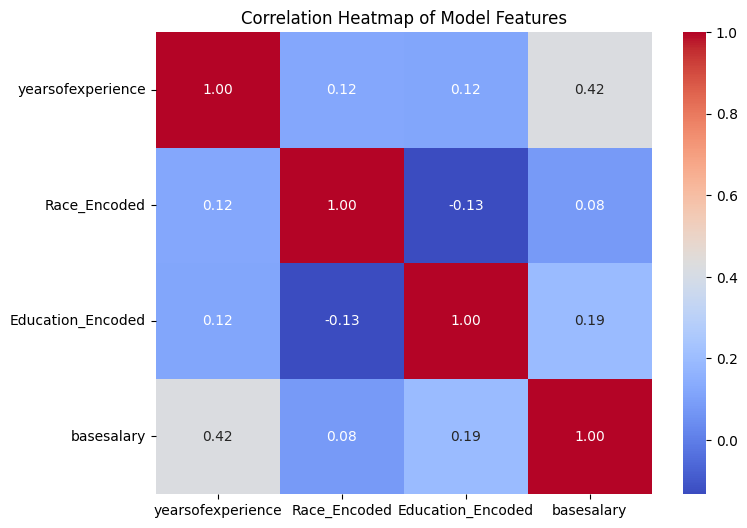

In [47]:
featuresforcor = encoded_df[['yearsofexperience', 'Race_Encoded', 'Education_Encoded','basesalary']]
correlation_matrix = featuresforcor.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Model Features')
plt.show()